In [26]:
import pandas as pd
import scaffoldgraph as sg
import matplotlib.pyplot as plt

# Import scaffoldgraph
import scaffoldgraph as sg

# Import networkx
import networkx as nx

# Import plotting tools
import matplotlib.pyplot as plt

# Import rdkit
from rdkit.Chem import Draw
from rdkit import Chem

import random
import os


df = pd.read_csv('dataset/AID_628/AID_628_datatable.csv', skiprows=[1,2,3])

In [3]:
df

,PUBCHEM_RESULT_TAG,PUBCHEM_SID,PUBCHEM_CID,PUBCHEM_EXT_DATASOURCE_SMILES,PUBCHEM_ACTIVITY_OUTCOME,PUBCHEM_ACTIVITY_SCORE,PUBCHEM_ACTIVITY_URL,PUBCHEM_ASSAYDATA_COMMENT,Value,Bscore,...,Bscore_mean,Bscore_stddev,DMSO_mean,DMSO_stddev,EC80_mean,EC80_stddev,ECMAX_mean,ECMAX_stddev,zprime_DMSO_EC80,zprime_DMSO_ECMAX
0,1,3288105,1244565,C1(=C(SN=C1C(=O)O)Cl)Cl,Inactive,0,NaN,NaN,448.163,-0.024585,...,-0.124282,1.541530,19.7322,5.54424,451.462,42.3834,496.705,39.3624,0.667,0.718
1,2,3711095,2405160,CC1=CC(=C(O1)C)C(=O)OCC(=O)NC(=O)NC(C)(C)C,Inactive,0,NaN,NaN,434.183,0.328870,...,-0.166912,1.241060,18.7552,3.35862,459.096,36.6608,643.398,46.5372,0.727,0.760
2,3,3711096,2121806,CCSC1=NN=C(S1)NC(=O)C2=CC=CC=N2,Inactive,0,NaN,NaN,429.836,-0.105317,...,0.000093,0.308794,20.7966,4.66286,377.087,55.4425,492.802,72.3944,0.494,0.510
3,4,3711097,2997503,CN(C)C1=C(C(=NP(=N1)(N(C)C)N(C)C)C2=CC=CC=C2)C#N,Inactive,0,NaN,NaN,533.469,0.393694,...,-0.217301,1.370900,23.9606,6.64197,487.309,41.6948,710.954,63.9445,0.687,0.692
4,5,3711098,2128178,COC1=CC2=C(C=C1)C(=CO2)CC(=O)OCC(=O)N3CCC4=CC=...,Inactive,0,NaN,NaN,582.755,1.396240,...,-0.293986,1.892640,23.6240,4.95543,519.239,40.1436,708.693,60.5008,0.727,0.713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63657,63658,866150,667409,CC1=NN=C(S1)SCCCN2C3=C(N=C2N4CCCCC4)N(C(=O)NC3...,Inactive,0,NaN,NaN,287.510,0.197314,...,-0.257338,1.316060,22.7980,6.17622,257.862,21.4071,501.518,23.6761,0.648,0.813
63658,63659,866152,667411,CC1=CC=C(C=C1)CN2C(=NC3=C2C(=O)N(C(=O)N3C)C)CN...,Inactive,0,NaN,NaN,596.388,0.485316,...,-0.244928,1.619430,22.5893,4.32764,600.750,49.3922,809.898,80.2941,0.721,0.678
63659,63660,866155,667414,COC1=C(C=C2CN(CCC2=C1)C(=O)CC3CC4CCC3C4)OC,Inactive,0,NaN,NaN,251.245,-0.006948,...,-0.168228,1.403430,12.8221,2.72594,261.019,21.4862,333.788,24.3034,0.707,0.747
63660,63661,866156,20279,C1[C@@H]([C@H](O[C@H]1N2C=NC3=C(N=C(N=C32)Cl)N...,Inactive,0,NaN,NaN,570.837,0.748326,...,-1.053560,3.290710,16.7086,3.10624,527.237,56.3575,715.418,77.6717,0.651,0.653


In [15]:
network = sg.ScaffoldTree.from_dataframe(
    df, smiles_column='PUBCHEM_EXT_DATASOURCE_SMILES', name_column='PUBCHEM_EXT_DATASOURCE_SMILES',
    data_columns=['PUBCHEM_ACTIVITY_OUTCOME'], progress=True,
)

ScaffoldTree: 100%|██████████████████████████████████████████████████████████████| 63662/63662 [05:38<00:00, 188.01it/s]


In [34]:
tree = network

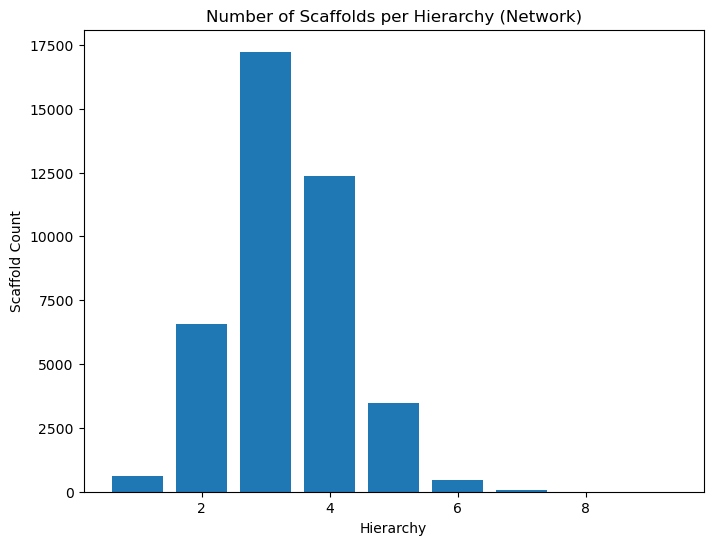

In [25]:
# We can get the number of scaffolds in each hierarchy easily

counts = network.get_hierarchy_sizes()  # returns a collections Counter object
lists = sorted(counts.items())
x, y = zip(*lists)

# Plot sizes as bar chart

plt.figure(figsize=(8, 6))
plt.bar(x, y)
plt.xlabel('Hierarchy')
plt.ylabel('Scaffold Count')
plt.title('Number of Scaffolds per Hierarchy (Network)')
plt.show()

PubChem ID: CN1C(=NN=C1SCC(=O)NC2CCCCC2)CC3=CSC(=N3)N
Predecessors of CN1C(=NN=C1SCC(=O)NC2CCCCC2)CC3=CSC(=N3)N is Tree: True


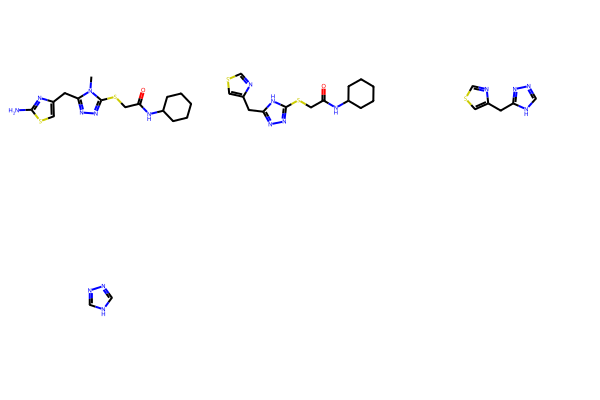

In [35]:
# We can choose a random molecule in the set and view its scaffold predecessors

random_pubchem_id = random.choice(list(tree.get_molecule_nodes()))
print('PubChem ID:', random_pubchem_id)
predecessors = nx.bfs_tree(tree, random_pubchem_id, reverse=True)

# We can validate that one molecules scaffold set forms a tree structure

print('Predecessors of {} is Tree: {}'.format(random_pubchem_id, nx.is_tree(predecessors)))

# Draw these scaffolds

predecessors_list = list(predecessors)
predecessors_list[0] = tree.nodes[predecessors_list[0]]['smiles'] # [0] is pubchem ID
Draw.MolsToGridImage([Chem.MolFromSmiles(x) for x in predecessors_list])

PubChem ID: C1(=C(SN=C1C(=O)O)Cl)Cl
Predecessors of C1(=C(SN=C1C(=O)O)Cl)Cl is Tree: True


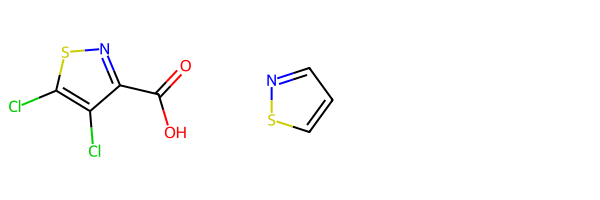

In [43]:
# We can choose a random molecule in the set and view its scaffold predecessors

random_pubchem_id = list(tree.get_molecule_nodes())[0]
print('PubChem ID:', random_pubchem_id)
predecessors = nx.bfs_tree(tree, random_pubchem_id, reverse=True)

# We can validate that one molecules scaffold set forms a tree structure

print('Predecessors of {} is Tree: {}'.format(random_pubchem_id, nx.is_tree(predecessors)))

# Draw these scaffolds

predecessors_list = list(predecessors)
predecessors_list[0] = tree.nodes[predecessors_list[0]]['smiles'] # [0] is pubchem ID
Draw.MolsToGridImage([Chem.MolFromSmiles(x) for x in predecessors_list])

PubChem ID: C1=CC2=C(C=C1O)OC3=C2C(=O)OC4=C3C=CC(=C4)O


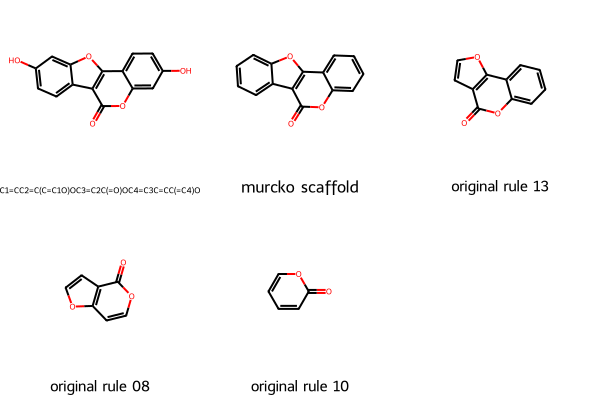

In [41]:
# We may also want to see what prioritization rules have been used at each step
# The name of the rule used is stored in the edge between two scaffolds
# Original rules can be viewed at the original publication (https://pubs.acs.org/doi/10.1021/ci600338x)

random_pubchem_id = random.choice(list(tree.get_molecule_nodes()))
print('PubChem ID:', random_pubchem_id)
predecessors = nx.bfs_tree(tree, random_pubchem_id, reverse=True)

rules = [random_pubchem_id]
for edge in predecessors.edges():
    # we need to get the edge attr from the original tree
    data = tree.edges[edge[::-1]]
    if data['type'] == 0:  # molecule -> scaffold
        rules.append('murcko scaffold')
    else:  # scaffold -> scaffold
        rules.append(data['rule'])

# Draw molecules
predecessors_list = list(predecessors)
predecessors_list[0] = tree.nodes[predecessors_list[0]]['smiles'] # [0] is pubchem ID
Draw.MolsToGridImage([Chem.MolFromSmiles(x) for x in predecessors_list], legends=rules)

Found 62 molecules containing scaffold, c1cnsc1



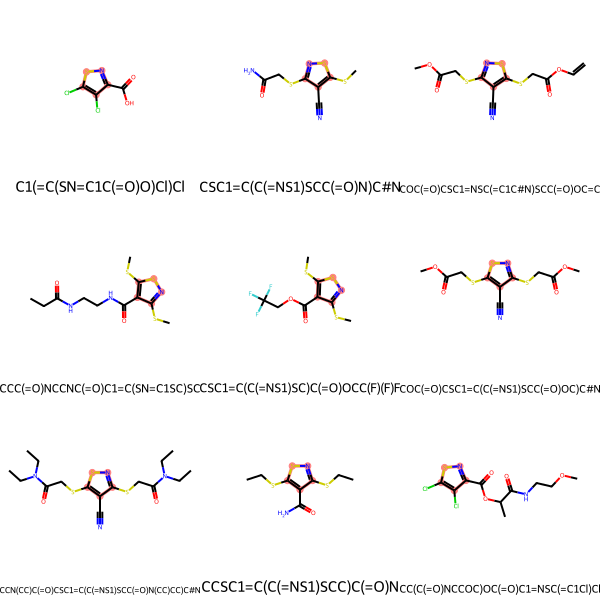

In [46]:
# Lets try the same thing but for molecules

query_smiles = 'c1cnsc1'  # lets use this subscaffold as a query
query_mol = Chem.MolFromSmiles(query_smiles)

molecules = []
for succ in nx.bfs_tree(network, query_smiles, reverse=False):
    if network.nodes[succ]['type'] == 'molecule':
        molecules.append(succ)

print('Found {} molecules containing scaffold, {}\n'.format(len(molecules), query_smiles))

# Molecules are PubChem IDs so lets get the SMILES and view som of the molecules

smiles = [network.nodes[pid]['smiles'] for pid in molecules]
mols = [Chem.MolFromSmiles(smi) for smi in smiles]

Draw.MolsToGridImage(mols, highlightAtomLists=[mol.GetSubstructMatch(query_mol) for mol in mols],
                    legends=molecules, maxMols=9)